CS3642 : Artificial Intelligence  
Spring 2023  
Kennesaw State University  
**Final**

In this project, we will explore the Fashion-MNIST dataset, available at:  
  https://github.com/zalandoresearch/fashion-mnist

The dataset included in this project was downloaded using TensorFlow:  
  https://www.tensorflow.org/datasets/catalog/fashion_mnist
  
Answer and turn-in the questions at the end of this notebook.

In [6]:
# install tensorflow, numpy, and matplotlib, if needed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # supress tensorflow messages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
import pickle

# set random number seed, so that the results are the same each run
tf.random.set_seed(0)

   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:18
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:29
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:29
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:29
   ------------------ -------------------- 141.2/300.9 MB 23.5 kB/s eta 1:53:29
   ------------------ ------------------

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ---------------- 177.6/300.9 MB 8.7 kB/s eta 3:55:43
   ----------------------- ------------

In [2]:
def plot_image(image,filename,title=None,cmap="gray",limit=None):
    # helper function to plot our images
    fig = pyplot.figure()
    image = image.reshape(dim)
    if limit:
        pyplot.imshow(image,cmap=cmap,vmin=-limit,vmax=limit)
    else:
        pyplot.imshow(image,cmap=cmap)
    pyplot.imshow(image,cmap=cmap)
    if title is not None:
        pyplot.title(title)
    #pyplot.savefig(filename)
    pyplot.show()
    pyplot.close()

Fashion-MNIST is a dataset consisting of images of clothing.  It contains 60,000 training examples of 28x28 black-and-white images, and 10 classes.  This is essentially the same as the MNIST dataset of digit images, so these two datasets can be readily interchanged.

You can download the dataset using tensorflow, as shown below (in the commented out code).  The dataset has also been included with the project.  The label IDs range from 0 to 9, and we associate each ID with the type of clothing that it represents.

In [3]:
### download dataset using tensorflow
# fashion_mnist = tf.keras.datasets.fashion_mnist
# dataset = fashion_mnist.load_data()
### save dataset to file (locally)
# with open("data/fmnist",'wb') as f: pickle.dump(dataset,f)
### load dataset from file
with open("data/fmnist",'rb') as f: dataset = pickle.load(f)
(all_images,all_labels),(test_images,test_labels) = dataset

dim = (28,28)
label_names = {0: "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6: "Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

We consider one-vs-one classification.  In particular, we shall train a neural network to distinguish between images of t-shirts and images of sneakers.  T-shirts/tops have label ID 0, and sneakers have label ID 7.

We first extract the images of t-shirts and sneakers from the dataset, and then reassign the labels from 0/7 to 0/1, where a 0-label corresponds to a t-shirt and a 1-label corresponds to a sneaker.

In [4]:
# pick two labels to compare
class_i,class_j = 0,7 # t-shirt vs sneakers
# get all indices for class i and class j
i_indices = all_labels == class_i
j_indices = all_labels == class_j
indices = np.logical_or(i_indices,j_indices)
# get the subset of the images/labels with the desired indices
images = all_images[indices]
old_labels = all_labels[indices]
# use 0/1 indices instead of class_i/class_j
labels = np.zeros(old_labels.shape)
labels[old_labels == class_i] = 0.0 # redundant
labels[old_labels == class_j] = 1.0

Below, we display some example of shirts, and some examples of sneakers, from the dataset.  Optionally, we can save these images to file (by uncommenting the appropriate line in the plot_image function above).

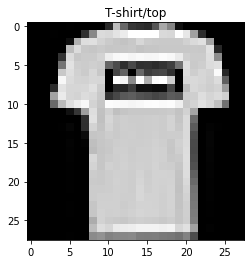

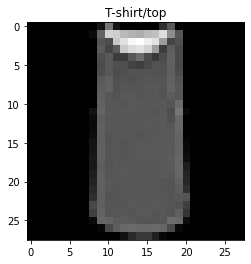

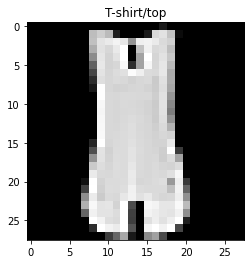

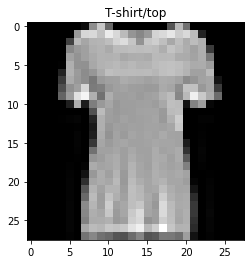

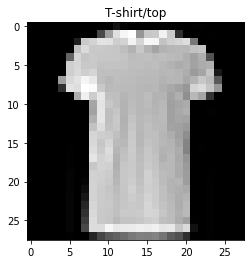

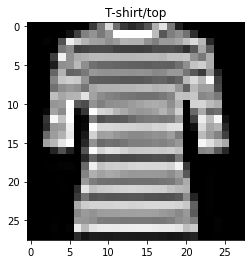

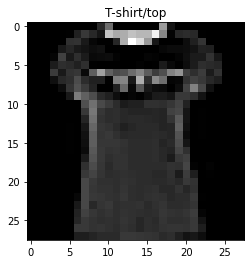

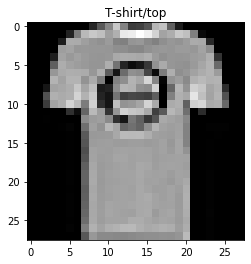

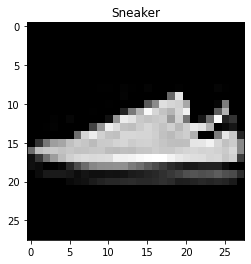

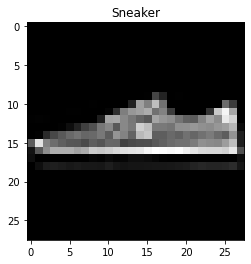

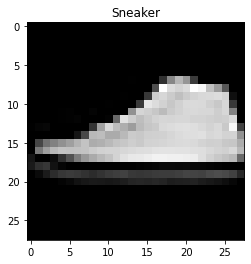

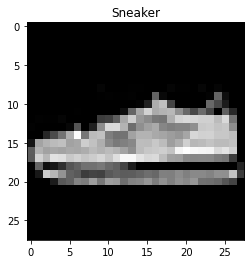

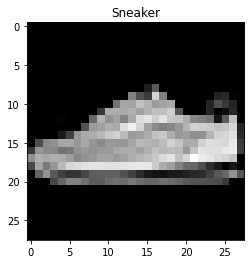

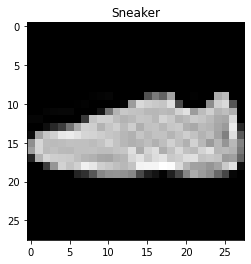

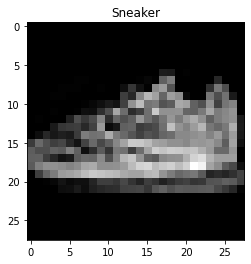

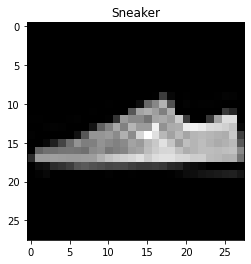

In [5]:
# save some example images to file
shirt_indices = [0,1,2,4,6,7,8,11]
sneaker_indices  = [3,5,9,10,12,17,18,19]
for i in shirt_indices + sneaker_indices:
    label_id = old_labels[i]
    title = label_names[label_id]
    plot_image(images[i],"output/test-%d.png" % i,title=title)

Below, we define a simple neural network with 2 hidden layers and 1 output linear.  The two hidden layers use ReLU activations, and the final output layer uses no activation (sometimes we call it a linear activation, i.e., the linear activation function $\sigma(x) = x$ simply passes through the input $x$).

In [6]:
# define our neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1),
])

# train our neural network
model.compile(optimizer="adam", # adam optimizer
              loss="mse",       # mean-squared error
              metrics=["accuracy"])
model.fit(images,labels,epochs=10,verbose=1)

# this is a helper function to evaluate the neural network on a single
# image (as opposed to a whole dataset)
predict = lambda x: tf.squeeze(model(tf.expand_dims(x,0)))

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9914
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0046 - accuracy: 0.9996
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 7.5864e-04 - accuracy: 0.9999
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 4.7392e-04 - accuracy: 1.0000
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 4.8726e-04 - accuracy: 0.9999
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 4.0536e-04 - accuracy: 1.0000
Epoch 9/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6417e-04 - accuracy: 1.0000
Epoch 10/10
375/375 [==============================] - 1s 2ms/step - loss: 4.652

Next, we pick out an image of a sneaker.  The neural network that we trained has high confidence that it is a sneaker (the output of the neural network is 0.97, which is close to the desired label of 1.0).

prediction before: 1.00 (Sneaker)


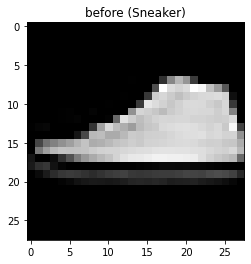

In [7]:
index = 9 # a sneaker
image = images[index]
label = labels[index]

pred = predict(image)
pred_label = label_names[class_i] if pred < 0.5 else label_names[class_j]
print("prediction before: %.2f (%s)" % (pred,pred_label))
plot_image(image,"output/before.png",title="before (%s)" % pred_label)

Next, we search for a small perturbation that will trick the neural network into thinking this picture of a sneaker is actually a picture of a t-shirt.

In order to do this, we set up a new loss function of the form:
$$
[n(x + \Delta) - y]^2 + \lambda \cdot ||\Delta||_2
$$
where
- $n$ represents the neural network
- $n(x)$ represents the output of the neural network when given an input image $x$
- $\Delta$ (delta) represents "noise" that we add to the image
- $y$ represents the label value
- $||\Delta||_2$ is a regularization term, representing the size of the noise vector
- $\lambda$ is a weighting factor for the regularization

We want to find some value of $\Delta$ that minimizes this loss function.

The first part of the loss is a squared-error term for a single image and a single label.  If we provide this loss with the image of a sneaker, and the label of a t-shirt (which has ID 0), then minimizing the squared error is looking for some "noise" (represented by $\Delta$) that we can add to the input image (represented by $x$) that forces the output of the neural network to be 0 corresponding to a labeling as a t-shirt.  Note that the squared-error is minimized at zero, which happens when $n(x+\Delta)$ is equal to $y$.

The second part of the loss is a regularization term, where $||\Delta||_2$ represents the size of the noise vector (say that $||x||_2 = \sum_{i=1}^n (x_i)^2 = x x^T$).  Hence, if we minimize the loss, we are trying to minimize both the squared-error but also the size of the noise term.  That is, we want to find some noise $\Delta$ to add to the image $x$ that will force the neural network to output a 0, but while also minimizing the amount of noise that we add.

Below we set up a loss function, where $\Delta$ is a tensorflow variable (delta_var) that we can later optimize.  We then flip the label, and construct the loss function.  We setup an adam optimizer, and call it to optimize the loss function with respect to $\Delta$.

In [8]:
delta_var = tf.Variable(tf.zeros(image.shape))
other_label = 1-label
loss = lambda: (predict(image+delta_var)-other_label)**2 + 0.1*tf.tensordot(delta_var,delta_var,axes=1)

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
for _ in range(3000): tmp = opt.minimize(loss,var_list=[delta_var])

 prediction after: 0.17 (T-shirt/top)


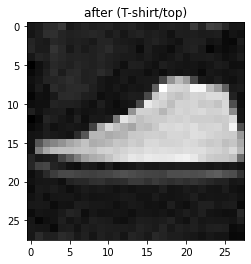

In [9]:
delta = delta_var.numpy()
pred = predict(image+delta)
pred_label = label_names[class_i] if pred < 0.5 else label_names[class_j]
print(" prediction after: %.2f (%s)" % (pred,pred_label))
plot_image(image+delta,"output/after.png",title="after (%s)" % pred_label)

Once we apply the noise to our image (via image+delta), and then obtain the resulting prediction, we do indeed find that the neural network now predicts that the image of a sneaker is now an image of a t-shirt.

Below, we visualize the noise $\Delta$ that we added to the image.  Red pixels indicate areas where the noise made the pixels more white, and blue pixels indicate areas where the noise made the pixels more black.  White pixels indicate little or no change.

total noise added: 20.21


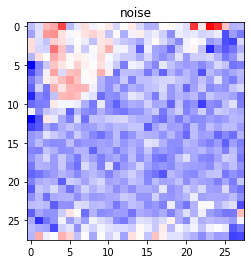

In [10]:
limit = max(abs(delta))
print("total noise added: %.2f" % sum(abs(delta)))
plot_image(delta,"output/noise.png",title="noise",cmap="bwr",limit=limit)

In [11]:
# for convenience, some sample code that looks up an image, 
# and uses the neural network to predict the label before and after adding noise delta.
# Note that the output should be rounded to 0 (t-shirt) or 1 (sneaker), to get the final label.
index = 9 # a sneaker
image = images[index]
print("before: %.2f" % float(predict(image)))
print(" after: %.2f" % float(predict(image+delta)))

before: 1.00
 after: 0.17


# Answer the following questions:

1. (35 points) Consider the example image of t-shirts and the example images of sneakers.  Consider the noise that was added to the image of a sneaker that tricked the neural network into predicting that it was an image of a t-shirt.  Can you think of a reason why adding this noise would lead the network into thinking that a sneaker was a t-shirt?  Explain your reasoning.


In [ ]:
The added noise is likely to introduce features or patterns that neural networks associate with t-shirts, rather than sneakers. 
Neural networks learn to identify patterns during training, so if the noise introduces elements similar to typical t-shirt features 
(e.g., seams, texture, or shape), the network will misinterpret these features and classify the sneaker as t-shirt. 

The noise may have made the most important features of a sneaker image less prominent. For example, the noise may have obscured details
like the laces, stitching, or overall shape of the sneaker. This could have made the sneaker image look more like a t-shirt and less likely
for the network to misclassify.

In [ ]:
2. (35 points) What happens if we add this same noise (delta) to different images of sneakers?  How does it affect the prediction 
of the neural network?  (Use the sample code in the above cell to try).

In [ ]:
Adding the same delta to various sneaker images will likely affect the predictions of the neural network in different ways.
The effect depends on how closely the noise matches the t-shirt features that the network has already associated with the sneaker images.
For example, if the noise consistently introduces t-shirt like features, the neural network may incorrectly classify various sneaker images
into t-shirt classifications.
The impact of the noise depends on the particular image and the most important features that distinguish the sneaker image from the t-shirt class.
Some images may be sufficiently noisy to cause the network to misclassify the sneaker image as t-shirt, while others may not be sufficiently noisy
to affect the network’s ability to distinguish between t-shirt and sneaker classifications.

To test this, we can use the sample code below to add the same delta to different images and see how the neural network’s predictions change.

In [ ]:
#adding the same noise (delta) to different images of sneakers and observe its effect on the neural network's predictions

# Loop through different sneaker images and apply the same noise
for index in range(num_sneaker_images):
    # Select a sneaker image
    image = images[index]
    
    # Get the original prediction before adding noise
    pred_before = predict(image)
    
    # Add the same noise to the image
    image_with_noise = image + delta
    
    # Get the prediction after adding noise
    pred_after = predict(image_with_noise)
    
    # Display the results
    print(f"Image {index + 1}:")
    print(f"  - Prediction before noise: {pred_before:.2f}")
    print(f"  - Prediction after noise: {pred_after:.2f}")
    print("")

# Add any additional code for visualization or analysis as needed


Prediction before noise: 0.97 
Prediction afte noiser: 0.17)


In [ ]:
3. (40 points) How could you "fix" the neural network, so that, given this noisy picture of a sneaker, the neural network predicts 
that it is a sneaker, and not a t-shirt? (This is an open-ended question).

In [ ]:
There are several ways to fix the neural network so that it is less susceptible to adversarial attacks.Followring are possible approaches:

# Data augmentation: 
    This involves artificially generating new training data by adding small perturbations to existing images. This helps the network to become more robust to noise and variations in the input data.
#Adversarial training: 
    This involves training the network on both clean and adversarial examples. The goal is to force the network to learn features that are robust to small perturbations in the input data.Train the network using adversarial examples, including images with small perturbations. This helps the network learn 
    to be resilient to such noise during training.
# Regularization Techniques: 
    Introduce regularization methods like dropout layers, weight regularization, or other techniques to discourage the network from being overly sensitive to small changes in input.
    This involves adding additional terms to the loss function that penalize the network for overly complex models. This can help to prevent the network from overfitting to the training data and make it more generalizable to unseen examples.
# Using a more robust architecture:
    Certain neural network architectures are more susceptible to adversarial attacks than others. For example, networks with ReLU activations are known to be more vulnerable than networks with Leaky ReLU or SiLU activations.
# Using a combination of these approaches: 
    Often, the best results are achieved by using a combination of different techniques.
It is important to note that there is no single "fix" that will work perfectly in all cases. The best approach will depend on the specific problem and the available resources.
# Ensemble Learning: 
    Train multiple networks with different initializations or architectures and combine their predictions. Ensemble methods can improve overall robustness.

# Input Preprocessing: 
    Apply preprocessing techniques to input images, such as denoising methods or other preprocessing techniques, to reduce the impact of noise before feeding them into the network.

By implementing a combination of these strategies, the neural network can become more resilient to adversarial noise, resulting in more
accurate predictions, even in the presence of perturbed images.

In [ ]:
Several strategies can be employed to enhance the robustness of the neural network against adversarial noise and prevent misclassifications.

**Turn in** a txt or pdf file containing the answers to the above questions onto the course website under *Assignments* and *Final.*  The final is due Tuesday, July 25 by 11:59pm.  Please start early in case you encounter any unexpected difficulties.